In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

tf.random.set_seed(1)
np.random.seed(1)

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# (x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784) #flatten
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype("float32")/ 255.
x_test = x_test.astype("float32")/ 255.

# x_train /= 255.
# x_test /= 255.

In [16]:
input_img = Input(shape=(784,))
print(input_img)

#encoder
encoder1 = Dense(128, activation='sigmoid')(input_img)
encoder2 = Dense(3)(encoder1) # 3: my target hidden dimension

#decoder
decoder1 = Dense(128, activation='sigmoid')(encoder2)
decoder2 = Dense(784)(decoder1)

autoencoder = Model(inputs=input_img, outputs=decoder2)
autoencoder.summary()

# (None, 128)               100480    => 784 * 128 + 128

Tensor("input_3:0", shape=(None, 784), dtype=float32)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 202,515
Trainable params: 202,515
Non-trainable params: 0
_________________________________________________________________


In [17]:
autoencoder.compile(optimizer='adam', loss='mse')

In [18]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test, x_test)) # batch_size는 보통 2의배수

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0497 - val_loss: 0.0417
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0419 - val_loss: 0.0391
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0399 - val_loss: 0.0375
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0387 - val_loss: 0.0369
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0379 - val_loss: 0.0364
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0374 - val_loss: 0.0361
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0370 - val_loss: 0.0360
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0366 - val_loss: 0.0357
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0364 - val_loss: 0.0352
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

In [19]:
encoder = Model(inputs=input_img, outputs=encoder2)

encoded_input = Input(shape=(3,))
decoded_layer1 = autoencoder.layers[-2]
decoded_layer2 = autoencoder.layers[-1]

decoder = Model(inputs=encoded_input, outputs=decoded_layer2(decoded_layer1(encoded_input)))

In [20]:
latent_vector = encoder.predict(x_test) # input으로 784차원을 넣는게 아니라 3차원으로 축소하여 대표하는 벡터로 바꿀 수 있다.
print(latent_vector)
reconstructed_imgs = decoder.predict(latent_vector)

[[ 2.24423637e+01  8.49207497e+00  3.39085503e+01]
 [ 3.62091484e+01 -1.61244259e+01 -2.37450051e+00]
 [ 4.19168510e+01  4.71970081e+00  1.04321508e+01]
 [-9.94331002e-01 -4.43969488e+00  1.18768525e+00]
 [ 3.74789476e+00 -7.54814863e+00  1.89536076e+01]
 [ 3.39443436e+01  4.26975870e+00  8.50899124e+00]
 [ 7.30818462e+00 -1.16093659e+00  1.47567720e+01]
 [ 6.96608686e+00 -1.06226254e+01  9.82066250e+00]
 [ 7.15083122e-01 -1.43631685e+00  2.61848021e+00]
 [ 1.05321980e+01  8.33549404e+00  1.71130657e+01]
 [ 4.55266386e-02 -1.45644035e+01  8.86390805e-01]
 [-1.34497964e+00 -1.23016586e+01  6.13179016e+00]
 [ 5.92368078e+00  1.69483438e-01  1.15294580e+01]
 [ 6.70370579e-01 -9.90585041e+00  9.34971333e-01]
 [ 3.44898567e+01 -2.51967168e+00  1.18802366e+01]
 [ 1.40069942e+01 -2.67965488e+01  6.55129433e-01]
 [ 4.67286825e+00 -3.68653464e+00  1.62088909e+01]
 [ 2.36238842e+01  6.87839603e+00  4.16969566e+01]
 [ 1.21158676e+01 -3.26656647e+01  8.31591320e+00]
 [ 4.82117701e+00 -2.84307218e+

<ipython-input-21-040a8c9f480d>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


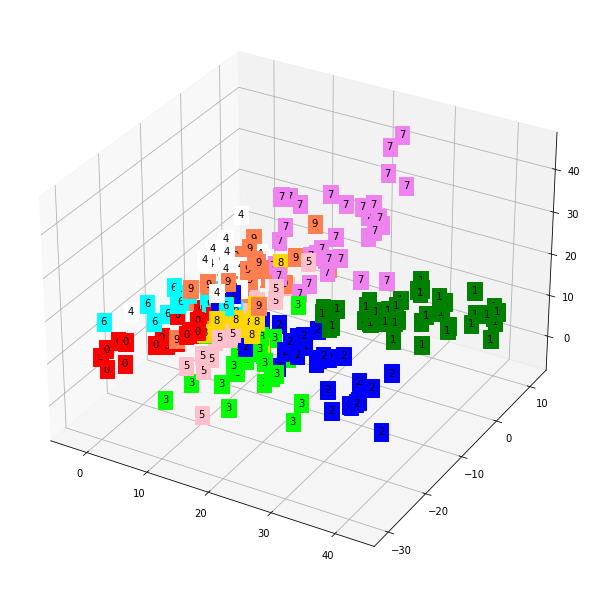

In [21]:
from pylab import rcParams

rcParams['figure.figsize'] = 10,8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:,0] # 300개 test중 첫번째 성분(x축)의 값
ys = latent_vector[:,1]
zs = latent_vector[:,2]

color = ['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor = c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

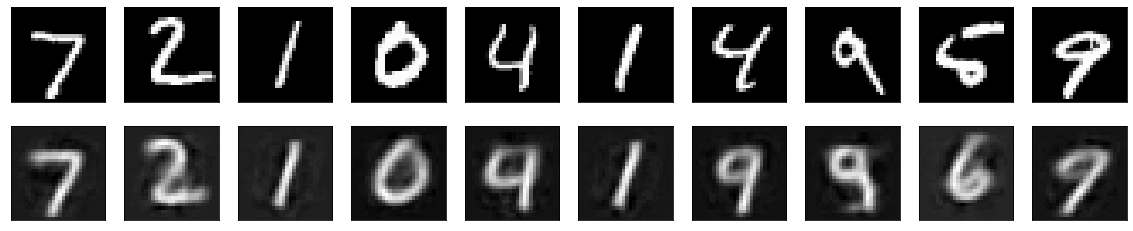

In [22]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False) # x축안보이게
    ax.get_yaxis().set_visible(False) # y축안보이게    
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(reconstructed_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False) # x축안보이게
    ax.get_yaxis().set_visible(False) # y축안보이게
    
plt.show()

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [24]:
input_img = Input(shape=(28,28,1)) # Convolution이기 때문에 3차원

encoder1 = Conv2D(16, (3,3), activation='relu', padding='same')(input_img) # 16 : filter 개수
encoder2 = MaxPooling2D((2,2), padding='same')(encoder1) # padding='same' => stride에 의해서 사이즈 줄어들고 kernel에의한 size는 변화없음 
encoder3 = Conv2D(8, (3,3), activation='relu', padding='same')(encoder2)
encoder4 = MaxPooling2D((2,2), padding='same')(encoder3)
encoder5 = Conv2D(8, (3,3), activation='relu', padding='same')(encoder4)
encoder6 = MaxPooling2D((2,2), padding='same')(encoder5)

decoder1 = Conv2D(8, (3,3), activation='relu', padding='same')(encoder6)
decoder2 = UpSampling2D((2,2))(decoder1)
decoder3 = Conv2D(8, (3,3), activation='relu', padding='same')(decoder2)
decoder4 = UpSampling2D((2,2))(decoder3)
decoder5 = Conv2D(16, (3,3), activation='relu')(decoder4)
decoder6 = UpSampling2D((2,2))(decoder5)
decoder7 = Conv2D(1, (3,3), activation='relu', padding='same')(decoder6)

autoencoder2 = Model(input_img, decoder7)
autoencoder2.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder2.summary()

'''
UpSampling2D 
              1 2 3 4
1 2 3 4   =>  1 2 3 4
5 6 7 8       5 6 7 8
              5 6 7 8
'''

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 8)           0   

In [8]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

autoencoder2.fit(x_train, x_train)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.6851


In [9]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

noise_factor = 0.5
x_train_noisy = x_train + noise_factor*np.random.normal(0, 1, size=x_train.shape) # 평균:0, std:1 정규분포
x_test_noisy = x_test + noise_factor*np.random.normal(0, 1, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0, 1) # min:0, max:1
x_test_noisy = np.clip(x_test_noisy, 0, 1) # min:0, max:1

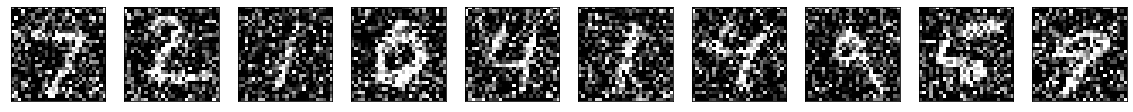

In [10]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(1,n,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False) # x축안보이게
    ax.get_yaxis().set_visible(False) # y축안보이게

plt.show()

In [11]:
input_img = Input(shape=(28,28,1))

encoder1 = Conv2D(32,(3,3),activation='relu', padding='same')(input_img) #filter 32개
encoder2 = MaxPooling2D((2,2), padding='same')(encoder1)
encoder3 = Conv2D(32,(3,3),activation='relu', padding='same')(encoder2)
encoder4 =  MaxPooling2D((2,2), padding='same')(encoder3)

decoder1 = Conv2D(32,(3,3),activation='relu', padding='same')(encoder4)
decoder2 = UpSampling2D((2,2))(decoder1)
decoder3 = Conv2D(32,(3,3),activation='relu', padding='same')(decoder2)
decoder4 = UpSampling2D((2,2))(decoder3)
decoder5 = Conv2D(1,(3,3),activation='sigmoid', padding='same')(decoder4)

autoencoder3 = Model(input_img, decoder5)
autoencoder3.compile(optimizer = 'adadelta', loss='binary_crossentropy')
autoencoder3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 32)        0   

In [12]:
autoencoder3.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                )

Epoch 1/100
469/469 [==============================] - 15s 31ms/step - loss: 0.6847 - val_loss: 0.6730
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6543 - val_loss: 0.6312
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5937 - val_loss: 0.5549
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5271 - val_loss: 0.5152
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5060 - val_loss: 0.5047
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4968 - val_loss: 0.4963
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4885 - val_loss: 0.4878
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4798 - val_loss: 0.4786
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4704 - val_loss: 0.4689
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4606 - val_

In [13]:
reconstructed_imgs3 = autoencoder3.predict(x_test_noisy)

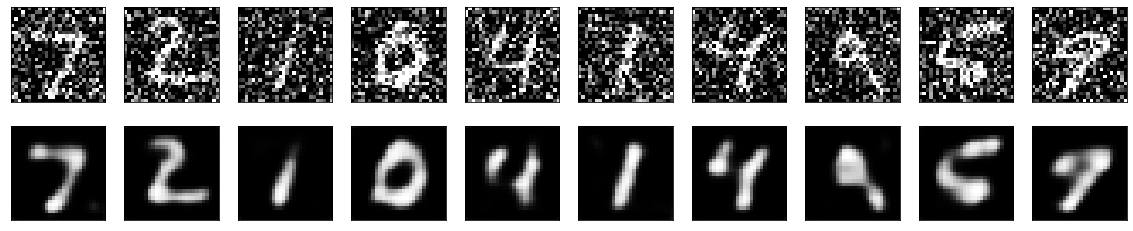

In [25]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False) # x축안보이게
    ax.get_yaxis().set_visible(False) # y축안보이게    
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(reconstructed_imgs3[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False) # x축안보이게
    ax.get_yaxis().set_visible(False) # y축안보이게
    
plt.show()